# Analysis of the Palmer penguin dataset
*************

The original dataset was taken from the official Github [page](https://allisonhorst.github.io/palmerpenguins/). 

![pinguins_img](images/palmerpenguins.png)

The data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The Palmer penguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

## The goal of the analysis

The aim of this project is to analyze a dataset using Python. The objective is to identify suitable variables that can effectively analyze the data. By creating bar charts, histograms, and other types of visualizations, the project aims to provide insights into the dataset through visualization.

*Please note that I have included the references for the articles and resources I used in the README file. Further I will mark them with numbers in square brackets.*
*******

## Import the dataset and the libraries

In [64]:
# import  libraries
import pandas as pd # for working with dataframes
import numpy as np # for working with arrays and creating some visualisations and calculations
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for some visualisations

In [65]:
# download the data set 
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [66]:
# output a sample of dataset 
data.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
323,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,MALE
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,MALE
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,FEMALE
83,Adelie,Torgersen,35.1,19.4,193.0,4200.0,MALE
267,Gentoo,Biscoe,50.5,15.9,225.0,5400.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
113,Adelie,Biscoe,42.2,19.5,197.0,4275.0,MALE
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,FEMALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE


I would like to check out the number of unique penguin species, islands, and other variables in this dataset. 

In [67]:
# Ref.[1]
data.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

There are **3 species of penguins**, each with **2 sexes**, and **3 different islands** in the dataset. Additionally, there are 4 columns that contain various measurements of penguins, but since these measurements are continuous numbers, there is no point to count their unique values.

Data stored in a data frame.  Each **row contains** the information of **one unique penguin** found on one of the three islands. Now I am going to use some functions to get more information of this dataset.

## Description of the dataset

In [68]:
# information about the data
# Ref.[2]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [69]:
# The data contains some NAN values. 
# I am using the isnull() method to check for the number of these values.
# Ref.[3]
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Some data is missing. As the percentage of acceptable loss was not given I allow that less than 5 %  is fine to ignore. Ref.[4]

Now I am going to find out the share of missing values.
Ref.[5]

* *data.isna()* returns a DataFrame with True/False values, where True represents missing values.

* If I take the *mean()* for each column, it will be calculated as the sum of 1s (TRUEs)   divided by the number of rows. It gives the proportion of missing values for each column.

* To find the percentage of missing values I multiply the result by 100

In [70]:
display(data.isna().mean()*100)

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [71]:
# Cheking for duplicates in rows:
data.duplicated().sum()

0

### Summary

* Dataset contains 7 columns, 344 rows. 

* There are **3 species of penguins**, **2 sexes**, and **3 different islands** in the dataset.

* The "species", "island", and "sex" columns contain the *object type* variables. The rest of the columns contain the *flot type* of variables.

* The higer percentage of NaN values among the columns is less than 4 % of the data (column "sex"), that might be considered as acceptable.

* The are no duplicated rows in the dataset.

## Exploring data distribution across various features

Examining the distribution of data for specific variables involves analyzing how the values of those variables are spread or arranged across different possible outcomes or ranges. 

In the beginning, I would like to examine the distribution of various species across the three islands.

### Distribution of penguin species across the islands

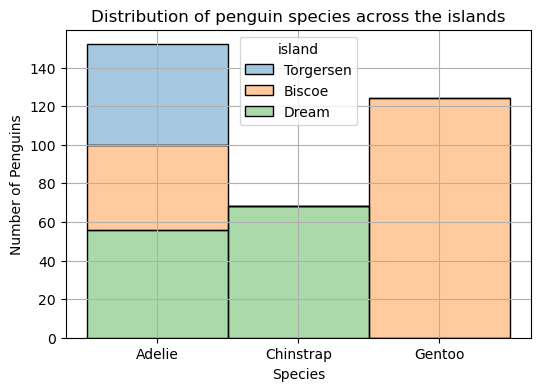

In [72]:
# Creating a histogram. Ref.[6,7]
# Creating a hist with the second parametr seems easier in Seaborn. 
# I can utilize the "hue" and "multiple" parameters to make the histogram more informative.
plt.figure(figsize=(6, 4))

# the multiple parameters lets helps to demonstrate the distribution without layering histograms.
# the hue parameter adds an additional feature for comparison.
sns.histplot(data=data, x='species', hue = 'island',multiple = 'stack' ,alpha=0.4)                                                                                    
plt.title('Distribution of penguin species across the islands')
plt.xlabel('Species')
plt.ylabel('Number of Penguins')
plt.grid(True)


In [73]:
# calculating the exact numbers of each species for the histogram above
data['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Interesting observation:**the only penguin species found on all 3 islands is the Adelie penguins.** 

Gentoo penguins reside on the Biscoe islands, while Chinstrap penguins inhabit the Dream island.

### Distribution of penguins across islands

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


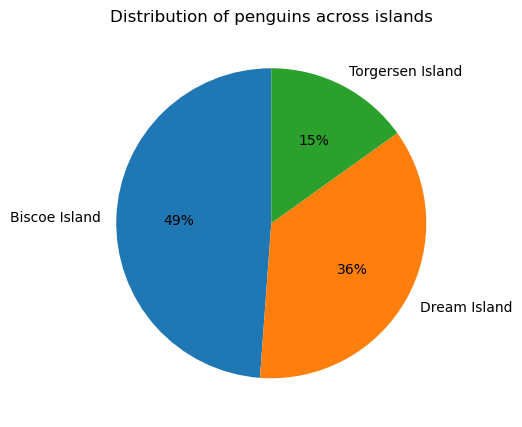

In [74]:
# calculating the exact number of species found on each island
# Ref.[8]
penguins_counts = data['island'].value_counts() # calculating how many penguins are on each island
print(penguins_counts) # checking the output in absolute numbers  

labels = ['Biscoe Island','Dream Island','Torgersen Island'] # creating a list of labels

plt.figure(figsize=(5, 7))

# the autopct is a parameter that specifies how the numerical values should be displayed.
plt.pie(penguins_counts, labels = labels, autopct = '%2.0f%%', startangle = 90) 
plt.title('Distribution of penguins across islands')
plt.show()

Based on the pie chart, Biscoe Island is home to almost half of all observed penguin species.
Torgersen Island is the least inhabited (15%) and only Adelie penguins are found there, according to the histogram above.

Now it might be ineresting to have a look at the male-to-female species ratio.

### Ratio of male and female species

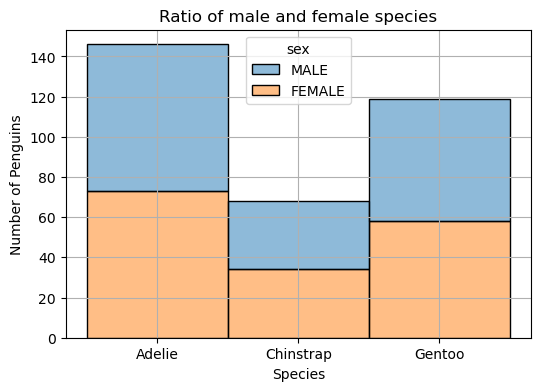

In [75]:
# Creating a plot for  demonstrating the ratio of male and female species and their total count.
plt.figure(figsize=(6, 4))
sns.histplot(data = data, x ='species', hue = 'sex',multiple = 'stack',alpha=0.5) 
plt.title('Ratio of male and female species')
plt.xlabel('Species')
plt.ylabel('Number of Penguins')
plt.grid(True)
plt.show()

The histogram above illustrating the ratio of male to female species indicates that there is an almost equal distribution of male and female penguins within the dataset.

### Summary:

Finishing the examination of semantic variables, I can summarize that

 * the dataset contains observations of 155 Adelie penguins, 124 Gentoo penguins, and 68 individual Chinstrap penguins. 
 * The ratio of male to female penguins is nearly equal within the dataset. 
 * Adelie penguins inhabit all three islands, while Gentoo penguins were only observed on Biscoe Island. Chinstrap penguins, comprising the smallest population in the dataset, were exclusively found on Dream Island. 
 * Biscoe Island is the most inhabited, with 49% of observed penguins located there. Additionally, 36% of penguins are from Dream Island, while the remaining 15% were marked as residents of Torgersen Island.

Next would like to analyze the measurable data of the penguins.

I am going to have a look at what is the most common **length of bill** of all penguins without specifying sex or species.

### Bill lengths across all penguin species

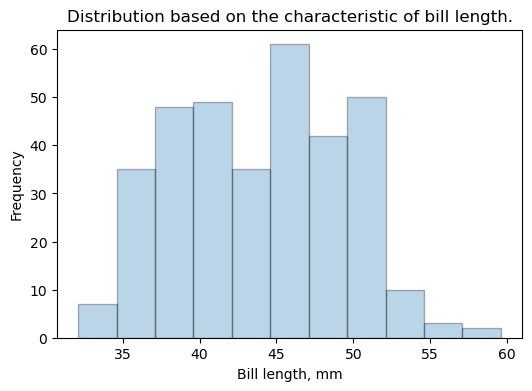

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

In [76]:
# The histogram below shows the distribution of data by feature "bill_length_mm".
plt.figure(figsize=(6, 4))
y = np.array(data['bill_length_mm']) # creating a numpy array 'y' to pass it to matplotlib function 
plt.hist(y, bins= 'auto',edgecolor = "black",alpha = 0.3)
plt.title("Distribution based on the characteristic of bill length.")
plt.xlabel("Bill length, mm")
plt.ylabel("Frequency")
plt.show()

data['bill_length_mm'].describe() # I use it here to get more numerical information for the histogram.

* The mean bill length is approximately 43.92 mm, with a standard deviation of 5.46 mm. 

* The bill lengths range from 32.1 to 59.6 millimeters, indicating a diverse range of sizes within the population.
 
* The dataset exhibits a normal standart distribution, as reflected by the similarity between the mean and median values.

Now I would like to have a look at the distribution of the bill lengths among the species.

### Comparison of bill lengths across different penguin species

In [77]:
# Checking the species we have in the dataset
data['species'].value_counts() 

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Now as I am going to compare the length of bill ascross different species,  I'll need to filter the data to obtain separate arrays containing the measurements of the bills for each of the three species.

In [78]:
# creating 3 dataframe with 3 species:
adelie_data = data[data['species'] == 'Adelie']
chinstrap_data = data[data['species'] == 'Chinstrap']
gentoo_data = data[data['species'] == 'Gentoo']

In [79]:
type(adelie_data)

pandas.core.frame.DataFrame

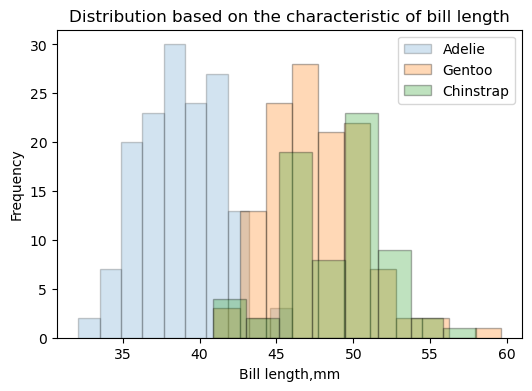

Adelie penguins(bill length). count    151.000000
mean      38.791391
std        2.663405
min       32.100000
25%       36.750000
50%       38.800000
75%       40.750000
max       46.000000
Name: bill_length_mm, dtype: float64
*************************
Chinstrap penguins(bill length). count    68.000000
mean     48.833824
std       3.339256
min      40.900000
25%      46.350000
50%      49.550000
75%      51.075000
max      58.000000
Name: bill_length_mm, dtype: float64
*************************
Gentoo penguins(bill length). count    123.000000
mean      47.504878
std        3.081857
min       40.900000
25%       45.300000
50%       47.300000
75%       49.550000
max       59.600000
Name: bill_length_mm, dtype: float64


In [80]:
# creating np.array for displaying histograms
# 'adelie_y' array, for example,  will contain the measurements 
# from the column "bill_length_mm" taken from the 'adelie_data'.


  
adelie_y = np.array(adelie_data['bill_length_mm']) 
chinstrap_y = np.array(chinstrap_data['bill_length_mm'])
gentoo_y = np.array(gentoo_data['bill_length_mm'])

plt.figure(figsize=(6,4))
# passing the arrays to plt.hist
plt.hist(adelie_y, bins= 'auto',edgecolor = "black",alpha = 0.2, label = 'Adelie')
plt.hist(gentoo_y, bins= 'auto',edgecolor = "black", alpha = 0.3,label='Gentoo')
plt.hist(chinstrap_y, bins= 'auto',edgecolor = "black", alpha = 0.3, label= 'Chinstrap')

plt.title("Distribution based on the characteristic of bill length")
plt.xlabel("Bill length,mm")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# I will use "describe" method to get clear numbers.
print("Adelie penguins(bill length).",adelie_data['bill_length_mm'].describe())
print('*************************')
print("Chinstrap penguins(bill length).", chinstrap_data['bill_length_mm'].describe())
print('*************************')
print("Gentoo penguins(bill length).", gentoo_data['bill_length_mm'].describe())


In general, the histogram below reveals peaks indicating the highest frequencies within the data distribution. 
However, the histograms tend to overlap, making it challenging to see the data on the left and right sides of the most common values.

Additionally, the code I wrote is a bit complicated, as I discovered, that I can achieve the same visualisation with the least lines of code.


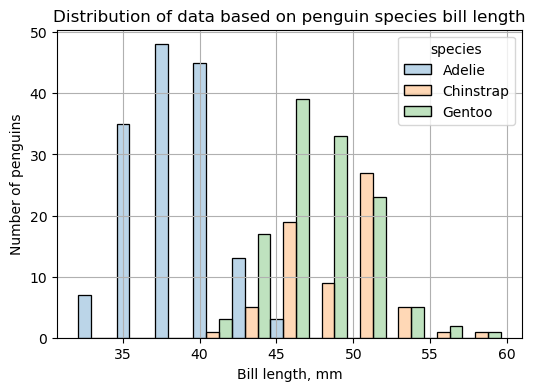

In [81]:
# Now I am using Seaborn for the same visualization. I find it better not only for its simplicity but also for the clarity in the histogram.
# The parameter multiple = 'dodge' allows me to avoid overlapping the histograms.

plt.figure(figsize = (6,4))
sns.histplot(data=data, x='bill_length_mm', hue = 'species',multiple = 'dodge', alpha=0.3)
plt.title('Distribution of data based on penguin species bill length')
plt.xlabel('Bill length, mm')
plt.ylabel('Number of penguins')
plt.grid(True)

plt.show()

Now the histogram looks good and even very rare values are seen. 
As it seen on the histogram and the description:


* Adelie penguins: Bill lengths range from 32.1 mm to 46.0 mm, with a median of **38.8 mm**.
* Chinstrap penguins: Bill lengths range from 40.9 mm to 58.0 mm, with a median of **49.55 mm.**
* Gentoo penguins: Bill lengths range from 40.9 mm to 59.6 mm, with a median of **47.30 mm.**

*****
## Correlation between variables    

I am going to examine the **correlation between the body mass and the bill length** of the penguin species. 
For now, it seems logical that the higher the body mass, the longer the bill length.

/Users/katelisovenko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

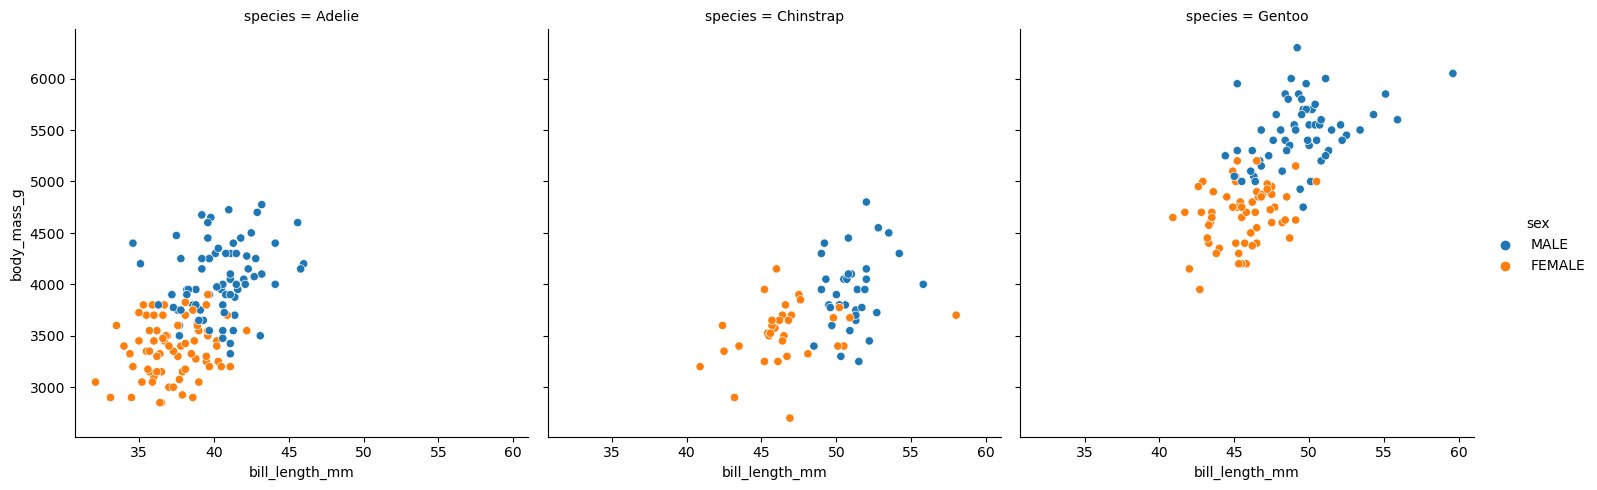

In [82]:
# Ref[9,10]
plt.figure(figsize = (3,3))
sns.relplot(x="bill_length_mm", y='body_mass_g', col = "species", data=data, hue = "sex", kind = "scatter")

plt.show()

The scatterplot illustrates the relationship between body mass, bill length, and sex across different penguin species. 

It appears that Adelie and Gentoo species exhibit a positive correlation between these features, while the correlation across Chinstrap penguins, although less evident, is still positive. 

Furthermore, it's observed that male penguins tend to have larger bills and higher body mass compared to female penguins.

### Coefficients of correlation  between variables "bill_length_mm" and "body_mass_g" for all 3 species together.

In [83]:
# Ref[11]
# This will calculate the coef of correlation whithout specifying penguin species.

data['bill_length_mm'].corr(data['body_mass_g'])

0.5951098244376298

There is no doubt that male spicies are more likely to have higher body mass and bill length than female spicies.
**The coefficient of correlation of 0.6 shows insignificant positive correlation between the variables**.
That means that somthimes we can say that bill length might be bigger when the mass of the penguins higher.

On the scatter plots above we can observe that probabbly differernt species have different correlathion between these variables.
For now I am goiing to calculate the coefficient of correlation between all the quantitive variables for all the species together. 
For this purpose I am going to filter the data creating a df 'data_corr' with all the quantitive variables for all the species together.


In [84]:
# data_corr is a filtered data. It  contains only quantitative variables.
#
data_corr = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
# I will have a look at this first:
data_corr.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0


### Creating a scatterplot matrix of the correlation between all the quantitive variables of all the species together.

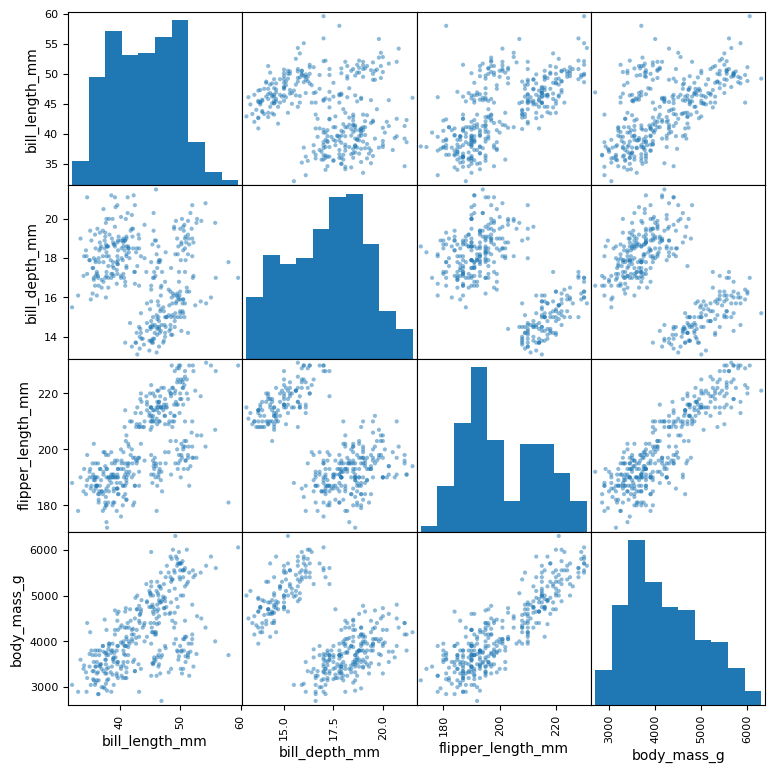

In [85]:
# ref.[12]
#The correlation matrix displays the correlation between all the quantitative data in the dataframe.

correlation_matrix = pd.plotting.scatter_matrix(data, figsize=(9, 9))



To gain a more precise understanding, I will calculate the correlation coefficient for each of these scatterplots.

In [86]:
# data_corr is a filtered data. It  contains only quantitative variables.
# I will need this to calculate the coefficients of correlation.
data_corr = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [87]:
# Ref.[13]
# Calculating the coefficient of correlation between all the quantitive variables of all the species together.

corr_matrix = round(data_corr.corr(),2)
display(corr_matrix)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


The correlation between the measurements of all penguin species is quite general. However, based on the correlation coefficients provided above, there is a strong correlation (0.87) between flipper length and body mass. This means that as the body mass of penguins increases, so does their flipper length. Additionally, a positive correlation (0.66) is observed between flipper length and bill length anf between the body mass and bill length.

### Correlations between quantitative variables across various penguin species.

Since I've already sorted the data into three separate dataframes, I can now create correlation matrices for each of them individually. This will allow me to examine whether the correlations between variables discovered previously tend to be stronger within each penguin species.

##### Correlation matrix for Adelie penguins.

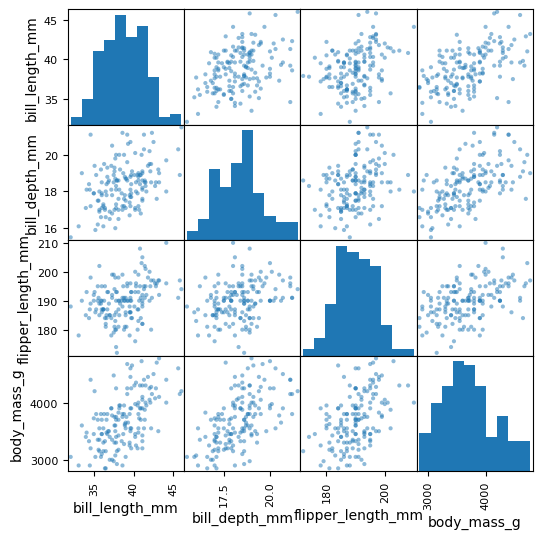

In [92]:
# 'adelie_data' contains Adelie penguins data.
correlation_matrix = pd.plotting.scatter_matrix(adelie_data, figsize=(6, 6))

In [89]:
# ''adelie_data_corr' is filtered data with quantitative variables only.
adelie_data_corr = adelie_data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

# calculating the coefficients of correlation 
corr_matrix_adelie = round(adelie_data_corr.corr(),2)
display(corr_matrix_adelie)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,0.39,0.33,0.55
bill_depth_mm,0.39,1.00,0.31,0.58
flipper_length_mm,0.33,0.31,1.00,0.47
body_mass_g,0.55,0.58,0.47,1.00


* There is some positive correlation between bill depth and body mass (0.58) and body mass and bill lenght.
* Other coefficients demonstrate a weak correlation.

##### Correlation matrix for Gentoo penguins.

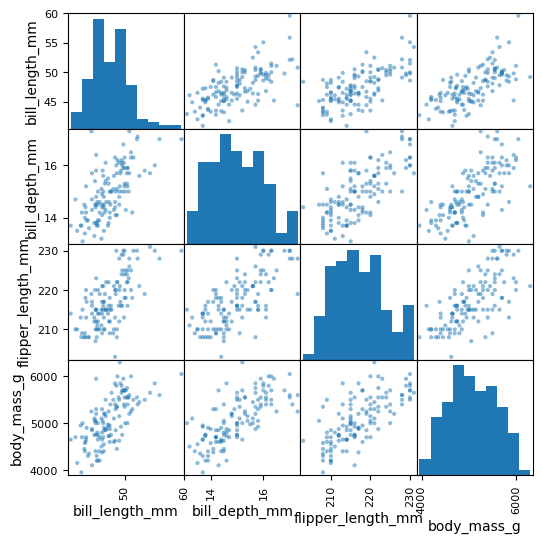

In [93]:
# 'gentoo_data' contains Gentoo penguins data.
correlation_matrix = pd.plotting.scatter_matrix(gentoo_data, figsize=(6, 6))

In [94]:
# ''adelie_data_corr' is filtered data with quantitative variables only.
gentoo_data_corr = gentoo_data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

# calculating the coefficients of correlation 
corr_matrix_adelie = round(gentoo_data_corr.corr(),2)
display(corr_matrix_adelie)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,0.64,0.66,0.67
bill_depth_mm,0.64,1.00,0.71,0.72
flipper_length_mm,0.66,0.71,1.00,0.70
body_mass_g,0.67,0.72,0.70,1.00


* The strongest correlation, with a coefficient of 0.72, is observed between bill depth and body mass.
* Bill length correlates strongly with flipper length (0.66) and body mass (0.67).
* Flipper length and body mass are also positively correlated, with a coefficient of 0.70.

##### Correlation matrix for Chinstrap penguins.

***

# End
